In [1]:
pip install tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  2


In [3]:
from tensorflow.python.client import device_lib

In [4]:
#print(device_lib.list_local_devices())


In [5]:
#sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))

In [6]:
!pip install --upgrade pip
!pip install pandas as pd
!pip install numpy as np
!pip install keras

import tensorflow.compat.v1  as tf
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras



In [7]:
!pip install imblearn
!pip install seaborn

In [8]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
NUM_THREADS=6

config = tf.ConfigProto(device_count = {'GPU': 60 , 'CPU': 30} ) #intra_op_parallelism_threads=NUM_THREADS)# 
sess = tf.Session(config=config) 
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
tf.compat.v1.keras.backend.set_session(sess)

In [9]:
!rm -rf ./logs/

In [10]:
data_train=pd.read_csv('/tf/tensorflow-tutorials/Modelo_1/CICLOS_v3/RGB/1/Coordenadas_das_juntas_de_todos_para_validacao_1_ciclos_RGB.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos.csv')

In [11]:
data_train

,x_20,y_20,z_20,x_15,y_15,z_15,x_14,y_14,z_14,x_13,...,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,Movimento
0,-0.182729,-2.261626,1.069786,-0.254453,-2.201810,0.169546,-0.265007,-2.143148,0.531043,-0.257338,...,-0.455434,-2.219135,0.875729,-0.101303,-2.283853,0.841980,-0.094052,-2.166124,0.522252,0.0
1,-0.173706,-0.941828,1.162586,-0.221014,-0.972176,0.179882,-0.223836,-0.879416,0.542818,-0.245504,...,-0.403022,-0.811284,0.926113,-0.088376,-0.967917,0.901414,-0.101525,-0.917496,0.541304,0.0
2,-0.129945,0.189778,1.166395,-0.161621,0.178905,0.179696,-0.174718,0.254095,0.543643,-0.206104,...,-0.380290,0.282709,0.924451,-0.031758,0.189209,0.910267,-0.030673,0.256764,0.546710,0.0
3,-0.124664,0.706639,1.140597,-0.077828,0.725810,0.135917,-0.096160,0.676961,0.518034,-0.074426,...,0.008751,0.596174,0.892371,-0.173883,0.739093,0.852985,-0.144803,0.780496,0.471692,0.0
4,-0.134638,-1.012455,1.139571,-0.084457,-0.990505,0.152156,-0.086161,-1.079724,0.510838,-0.053528,...,0.131218,-1.083394,0.878924,-0.231329,-1.015061,0.883729,-0.218316,-1.052858,0.502769,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,-0.151132,0.757851,1.158681,-0.143256,0.766361,0.157272,-0.145283,0.759978,0.540349,-0.139729,...,-0.089665,0.698784,0.934366,-0.160499,0.784582,0.905386,-0.163055,0.775038,0.533693,5.0
999,0.028517,-0.499586,1.156798,0.027363,-0.481736,0.147218,0.054812,-0.553954,0.538724,0.100560,...,0.224859,-0.698590,0.947655,-0.055841,-0.483628,0.899874,-0.037672,-0.516711,0.521088,5.0
1000,0.037074,-1.644885,1.146993,0.064771,-1.533130,0.152823,0.078090,-1.637920,0.526455,0.111604,...,0.318114,-1.746747,0.890936,-0.062744,-1.653746,0.892666,-0.053415,-1.709165,0.517231,5.0
1001,-0.138703,-1.342628,1.152994,-0.168697,-1.311010,0.147649,-0.165271,-1.292177,0.530201,-0.198171,...,-0.307775,-1.175317,0.927763,-0.072490,-1.364297,0.894237,-0.073785,-1.337336,0.517375,5.0


In [12]:
data_test=pd.read_csv('/tf/tensorflow-tutorials/Modelo_1/CICLOS_v3/RGB/2/Coordenadas_das_juntas_de_todos_para_validacao_2_ciclos_RGB.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos.csv')

In [13]:
data_test

,x_20,y_20,z_20,x_15,y_15,z_15,x_14,y_14,z_14,x_13,...,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,Movimento
0,-0.177861,-1.761884,1.103456,-0.244349,-1.735418,0.175256,-0.251326,-1.663796,0.536388,-0.252857,...,-0.434491,-1.692528,0.893934,-0.094729,-1.785106,0.863090,-0.094540,-1.692693,0.528048,0.0
1,-0.126330,0.546627,1.147921,-0.102180,0.555760,0.148958,-0.117849,0.541307,0.525151,-0.109907,...,-0.094360,0.499064,0.900377,-0.135844,0.568593,0.868350,-0.112034,0.598420,0.565027,0.0
2,-0.101783,-1.782109,1.138322,-0.117908,-1.783883,0.144585,-0.109926,-1.788823,0.516410,-0.108731,...,-0.115449,-1.696822,0.889902,-0.098787,-1.809676,0.881540,-0.095997,-1.789329,0.508223,0.0
3,-0.020340,0.159292,1.143394,-0.049876,0.160311,0.135645,-0.075225,0.217264,0.514178,-0.091675,...,-0.243295,0.155706,0.900780,0.062341,0.166553,0.880552,0.039745,0.216965,0.509417,0.0
4,-0.113378,0.354130,1.154693,-0.056234,0.376972,0.165195,-0.063204,0.305343,0.537843,-0.037139,...,0.128364,0.239995,0.909439,-0.195286,0.384494,0.899744,-0.179888,0.349301,0.538327,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-0.061697,-0.132280,1.167289,-0.008612,-0.088536,0.137893,0.009818,-0.180202,0.489966,0.020628,...,0.200630,-0.220433,0.864705,-0.165412,-0.132825,0.903937,-0.196139,-0.189923,0.501039,5.0
480,-0.202902,-2.336349,1.135791,-0.286380,-2.312260,0.142791,-0.271972,-2.307529,0.502423,-0.274942,...,-0.472610,-2.244811,0.914444,-0.126284,-2.334716,0.885164,-0.095272,-2.292596,0.510753,5.0
481,-0.171107,0.351892,1.158506,-0.167356,0.348954,0.162940,-0.176280,0.366727,0.542626,-0.182763,...,-0.168238,0.367924,0.933816,-0.155841,0.366917,0.904757,-0.163004,0.373164,0.529042,5.0
482,0.033337,-1.117589,1.152123,0.049180,-1.057077,0.150991,0.068057,-1.143972,0.533483,0.106526,...,0.280843,-1.257892,0.916255,-0.058943,-1.114501,0.896125,-0.046852,-1.154005,0.517907,5.0


In [14]:
import seaborn as sns

In [15]:
data_train.corr()

,x_20,y_20,z_20,x_15,y_15,z_15,x_14,y_14,z_14,x_13,...,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,Movimento
x_20,1.000000,0.027665,0.024382,0.957599,0.025929,-0.046333,0.938074,0.026085,-0.023603,0.937348,...,0.693665,0.017857,-0.008701,0.930497,0.031449,-0.027044,0.903067,0.026444,-0.049041,-0.073019
y_20,0.027665,1.000000,0.231843,0.099151,0.998089,0.241182,0.104059,0.998480,0.231588,0.091239,...,0.162178,0.992722,0.119847,-0.045486,0.996536,0.083799,-0.056512,0.991467,0.046223,0.019789
z_20,0.024382,0.231843,1.000000,0.059738,0.232391,0.270298,0.062862,0.229470,0.541434,0.042298,...,0.051618,0.231854,0.587456,-0.006261,0.232602,0.591691,-0.021824,0.220967,0.387964,0.051973
x_15,0.957599,0.099151,0.059738,1.000000,0.100076,-0.033152,0.988083,0.087995,-0.030158,0.982363,...,0.829830,0.072602,0.009710,0.808410,0.104898,-0.002954,0.770409,0.091205,-0.037773,-0.057467
y_15,0.025929,0.998089,0.232391,0.100076,1.000000,0.252024,0.108442,0.998055,0.235448,0.095654,...,0.174391,0.991695,0.114329,-0.054707,0.995045,0.077633,-0.066339,0.988273,0.039759,0.020596
z_15,-0.046333,0.241182,0.270298,-0.033152,0.252024,1.000000,-0.034232,0.246680,0.647567,-0.035819,...,0.000173,0.249964,-0.014833,-0.078464,0.252632,-0.071270,-0.077265,0.249228,-0.040317,-0.026653
x_14,0.938074,0.104059,0.062862,0.988083,0.108442,-0.034232,1.000000,0.092363,-0.035555,0.992600,...,0.881799,0.080038,0.010046,0.760425,0.107746,-0.004698,0.724465,0.089969,-0.045126,-0.057428
y_14,0.026085,0.998480,0.229470,0.087995,0.998055,0.246680,0.092363,1.000000,0.238272,0.077843,...,0.137962,0.995429,0.117240,-0.035335,0.994927,0.079361,-0.044603,0.990937,0.042696,0.019293
z_14,-0.023603,0.231588,0.541434,-0.030158,0.235448,0.647567,-0.035555,0.238272,1.000000,-0.042363,...,-0.048767,0.236847,0.250171,-0.012772,0.232562,0.076520,-0.004128,0.236513,0.055117,0.019293
x_13,0.937348,0.091239,0.042298,0.982363,0.095654,-0.035819,0.992600,0.077843,-0.042363,1.000000,...,0.895533,0.060447,0.000355,0.750193,0.095796,-0.007724,0.712520,0.077190,-0.038681,-0.066838


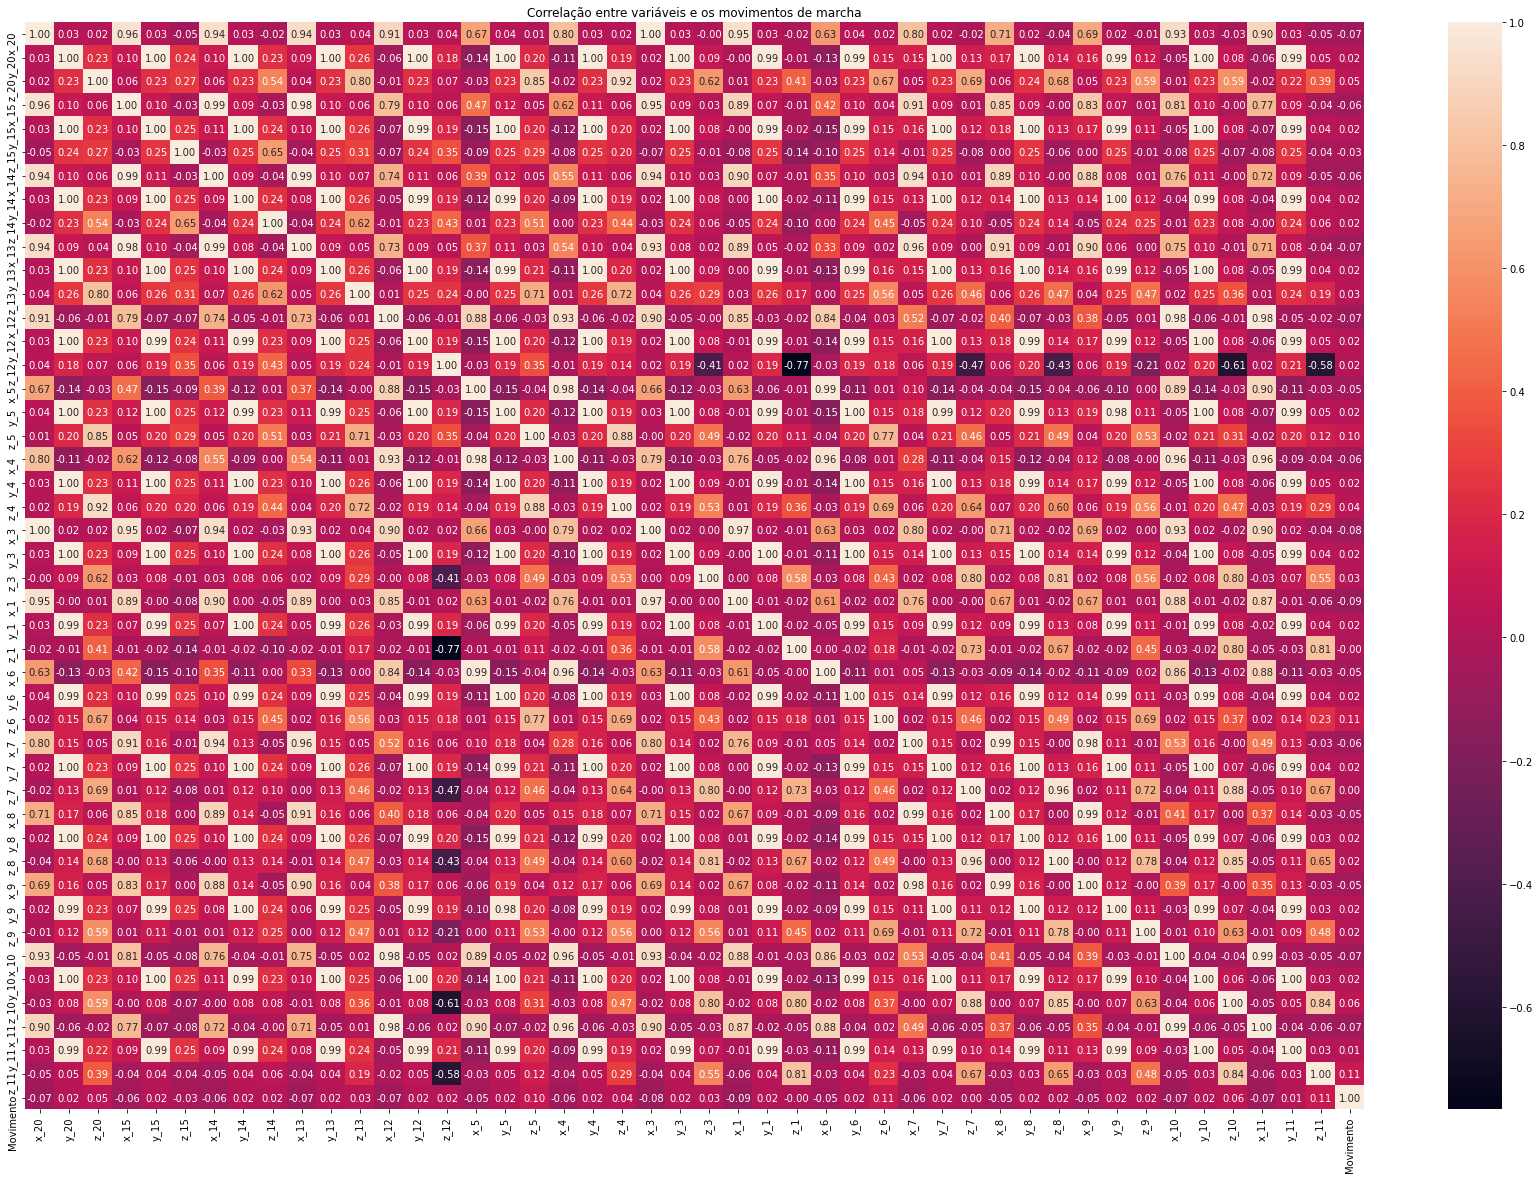

In [16]:
plt.figure(figsize=(30, 20))

sns.heatmap(data_train.corr(),
            annot = True,
            fmt = '.2f')
plt.title('Correlação entre variáveis e os movimentos de marcha')
plt.savefig('Correlação entre variáveis e os movimentos de marcha')
plt.show()

In [242]:
features=['x_20','y_20','z_20','x_15','y_15','z_15','x_14','y_14','z_14','x_13','y_13','z_13','x_12','y_12','z_12','x_5','y_5','z_5','x_4','y_4','z_4','x_3','y_3','z_3','x_1','y_1','z_1','x_6','y_6','z_6','x_7','y_7','z_7','x_8','y_8','z_8','x_9','y_9','z_9','x_10','y_10','z_10','x_11','y_11','z_11','Movimento']
#features=['y_20','z_20','y_15','y_14','z_14','y_13','z_13','y_12','z_12','y_5','z_5','y_4','z_4','y_3','z_3','y_1','y_6','z_6','y_7','z_7','y_8','z_8','y_9','z_9','y_10','z_10','y_11','z_11','Movimento']
#features=['z_20','z_14','z_5','y_6','z_6','z_10','z_11','Movimento']

dataset_train=data_train[features]

In [243]:
dataset_train

,x_20,y_20,z_20,x_15,y_15,z_15,x_14,y_14,z_14,x_13,...,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,Movimento
0,-0.182729,-2.261626,1.069786,-0.254453,-2.201810,0.169546,-0.265007,-2.143148,0.531043,-0.257338,...,-0.455434,-2.219135,0.875729,-0.101303,-2.283853,0.841980,-0.094052,-2.166124,0.522252,0.0
1,-0.173706,-0.941828,1.162586,-0.221014,-0.972176,0.179882,-0.223836,-0.879416,0.542818,-0.245504,...,-0.403022,-0.811284,0.926113,-0.088376,-0.967917,0.901414,-0.101525,-0.917496,0.541304,0.0
2,-0.129945,0.189778,1.166395,-0.161621,0.178905,0.179696,-0.174718,0.254095,0.543643,-0.206104,...,-0.380290,0.282709,0.924451,-0.031758,0.189209,0.910267,-0.030673,0.256764,0.546710,0.0
3,-0.124664,0.706639,1.140597,-0.077828,0.725810,0.135917,-0.096160,0.676961,0.518034,-0.074426,...,0.008751,0.596174,0.892371,-0.173883,0.739093,0.852985,-0.144803,0.780496,0.471692,0.0
4,-0.134638,-1.012455,1.139571,-0.084457,-0.990505,0.152156,-0.086161,-1.079724,0.510838,-0.053528,...,0.131218,-1.083394,0.878924,-0.231329,-1.015061,0.883729,-0.218316,-1.052858,0.502769,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,-0.151132,0.757851,1.158681,-0.143256,0.766361,0.157272,-0.145283,0.759978,0.540349,-0.139729,...,-0.089665,0.698784,0.934366,-0.160499,0.784582,0.905386,-0.163055,0.775038,0.533693,5.0
999,0.028517,-0.499586,1.156798,0.027363,-0.481736,0.147218,0.054812,-0.553954,0.538724,0.100560,...,0.224859,-0.698590,0.947655,-0.055841,-0.483628,0.899874,-0.037672,-0.516711,0.521088,5.0
1000,0.037074,-1.644885,1.146993,0.064771,-1.533130,0.152823,0.078090,-1.637920,0.526455,0.111604,...,0.318114,-1.746747,0.890936,-0.062744,-1.653746,0.892666,-0.053415,-1.709165,0.517231,5.0
1001,-0.138703,-1.342628,1.152994,-0.168697,-1.311010,0.147649,-0.165271,-1.292177,0.530201,-0.198171,...,-0.307775,-1.175317,0.927763,-0.072490,-1.364297,0.894237,-0.073785,-1.337336,0.517375,5.0


In [244]:
datasheet_train=dataset_train.values

In [245]:
dataset_test=data_test[features]

In [246]:
datasheet_test=dataset_test.values

In [247]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [248]:
import random
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.metrics import confusion_matrix

CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

##np.random.shuffle(datasheet_train)
##np.random.shuffle(datasheet_val)



In [249]:
datasheet_train

array([[-0.18, -2.26,  1.07, ..., -2.17,  0.52,  0.  ],
       [-0.17, -0.94,  1.16, ..., -0.92,  0.54,  0.  ],
       [-0.13,  0.19,  1.17, ...,  0.26,  0.55,  0.  ],
       ...,
       [ 0.04, -1.64,  1.15, ..., -1.71,  0.52,  5.  ],
       [-0.14, -1.34,  1.15, ..., -1.34,  0.52,  5.  ],
       [-0.08,  0.51,  1.16, ...,  0.52,  0.53,  5.  ]])

In [250]:
shuffle(datasheet_train)

array([[-0.14, -2.6 ,  1.13, ..., -2.56,  0.52,  3.  ],
       [-0.32, -1.23,  1.12, ..., -1.06,  0.42,  1.  ],
       [-0.04, -0.03,  1.17, ..., -0.11,  0.4 ,  3.  ],
       ...,
       [-0.12,  0.71,  1.14, ...,  0.78,  0.47,  0.  ],
       [-0.13, -0.92,  1.12, ..., -0.76,  0.43,  5.  ],
       [-0.15,  0.32,  1.13, ...,  0.36,  0.51,  2.  ]])

In [251]:
datasheet_test

array([[-0.18, -1.76,  1.1 , ..., -1.69,  0.53,  0.  ],
       [-0.13,  0.55,  1.15, ...,  0.6 ,  0.57,  0.  ],
       [-0.1 , -1.78,  1.14, ..., -1.79,  0.51,  0.  ],
       ...,
       [-0.17,  0.35,  1.16, ...,  0.37,  0.53,  5.  ],
       [ 0.03, -1.12,  1.15, ..., -1.15,  0.52,  5.  ],
       [-0.11, -0.5 ,  1.16, ..., -0.49,  0.53,  5.  ]])

In [252]:
valores_linhas_train=datasheet_train[:,:-1]
valores_coluna_saida_train=datasheet_train[:,-1:]

In [253]:
valores_linhas_test=datasheet_test[:,:-1]
valores_coluna_saida_test=datasheet_test[:,-1:]

In [254]:
valores_linhas_train

array([[-0.18, -2.26,  1.07, ..., -0.09, -2.17,  0.52],
       [-0.17, -0.94,  1.16, ..., -0.1 , -0.92,  0.54],
       [-0.13,  0.19,  1.17, ..., -0.03,  0.26,  0.55],
       ...,
       [ 0.04, -1.64,  1.15, ..., -0.05, -1.71,  0.52],
       [-0.14, -1.34,  1.15, ..., -0.07, -1.34,  0.52],
       [-0.08,  0.51,  1.16, ..., -0.12,  0.52,  0.53]])

In [255]:
valores_coluna_saida_train

array([[0.],
       [0.],
       [0.],
       ...,
       [5.],
       [5.],
       [5.]])

In [256]:
valores_linhas_test



array([[-0.18, -1.76,  1.1 , ..., -0.09, -1.69,  0.53],
       [-0.13,  0.55,  1.15, ..., -0.11,  0.6 ,  0.57],
       [-0.1 , -1.78,  1.14, ..., -0.1 , -1.79,  0.51],
       ...,
       [-0.17,  0.35,  1.16, ..., -0.16,  0.37,  0.53],
       [ 0.03, -1.12,  1.15, ..., -0.05, -1.15,  0.52],
       [-0.11, -0.5 ,  1.16, ..., -0.1 , -0.49,  0.53]])

In [257]:
valores_coluna_saida_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [258]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


nr = NearMiss() #Undersampling
smt = SMOTE() #Oversampling

In [259]:
valores_linhas_train, valores_coluna_saida_train = smt.fit_sample(valores_linhas_train, valores_coluna_saida_train)

# StratifieldShufflerSplit
### Quando se usa o mesmo dataset tanto para o treino e para a validação na proporção de 70/30

In [260]:
#StratifieldShufflerSplit
sss = StratifiedShuffleSplit(n_splits=6, test_size=0.2, random_state=2)
for train_index, test_index in sss.split(valores_linhas_train,valores_coluna_saida_train):
    X_train, X_test = valores_linhas_train[train_index], valores_linhas_train[test_index]
    Y_train, Y_test = valores_coluna_saida_train[train_index], valores_coluna_saida_train[test_index]

In [261]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True) # test_size é o percentual do dataset que vai ser usado nas amostras



# Para o treino com um dataset e  validação com o de 4 ciclos


In [262]:
##X_train, X_test, Y_train, Y_test =valores_linhas_train,valores_linhas_test,valores_coluna_saida_train,valores_coluna_saida_test
##X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2) # test_size é o percentual do dataset que vai ser usado nas amostras


In [263]:
import sklearn as sk
from sklearn import preprocessing
from joblib import dump

min_max_escalar=preprocessing.StandardScaler()  # MinMaxScaler()
#X_test=min_max_escalar.fit_transform(X_test)
min_max_escalar.fit_transform(X_train)
X_train=min_max_escalar.fit_transform(X_train)
X_val=min_max_escalar.fit_transform(X_val)

In [264]:
dump(min_max_escalar, 'scaler_filename.joblib')


['scaler_filename.joblib']

In [265]:
from joblib import load
scaler = load('scaler_filename.joblib')


In [266]:
##Normaliza os dados de teste com os parâmetros de normalização dos dados de treino
X_test=scaler.fit_transform(X_test)

In [267]:
from sklearn.metrics import classification_report

In [268]:
X_test.shape

(250, 45)

In [269]:
X_train

array([[-0.86,  0.62,  0.45, ..., -0.18,  0.68, -1.7 ],
       [-0.06, -1.24, -0.06, ..., -0.03, -1.34,  0.82],
       [-0.22,  1.67, -1.06, ..., -0.45,  1.73,  0.31],
       ...,
       [ 0.39,  0.64, -1.43, ..., -0.42,  0.61, -0.37],
       [-0.65,  0.55,  0.03, ..., -0.18,  0.65,  0.11],
       [-0.01,  1.03,  0.29, ..., -0.46,  0.95,  0.75]])

In [270]:
X_val

array([[-0.18, -0.05, -0.13, ...,  0.27,  0.03, -0.37],
       [ 0.19, -0.75,  0.2 , ...,  0.64, -0.59,  2.89],
       [-0.11, -1.1 ,  0.26, ...,  0.14, -1.13,  0.01],
       ...,
       [ 3.22, -0.2 , -0.51, ...,  2.52, -0.27, -0.2 ],
       [ 3.35, -0.15, -0.48, ...,  3.04, -0.1 , -0.88],
       [ 0.1 , -1.63, -0.83, ...,  0.25, -1.6 , -0.11]])

In [271]:
X_test

array([[ 0.04, -1.56,  0.19, ...,  0.38, -1.69,  0.17],
       [-0.19, -0.05,  0.17, ..., -0.64, -0.16,  0.21],
       [-1.03,  1.52,  1.04, ..., -0.79,  1.5 , -0.07],
       ...,
       [-0.86, -1.69,  0.39, ..., -0.2 , -1.72,  1.53],
       [-0.67, -1.47,  0.72, ..., -0.09, -1.5 ,  0.98],
       [ 0.38, -1.29,  0.7 , ...,  0.05, -1.25,  0.51]])

In [272]:
#%reload_ext tensorboard

In [273]:
#!rm -rf ./logs/ 

In [274]:
#X_train=X_train.reshape([-1,1, 5])
#X_val=X_val.reshape([-1,1, 5])

In [275]:
# %load_ext tensorboard

In [276]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.optimizers import RMSprop

model = Sequential([
    Dense(200, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.00175)),
    Dropout(0.5),
    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    #Dropout(0.3),
    Dense(10000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    Dense(200, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
##    Dense(200, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.00175)),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.000175),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
##    Dropout(0.3),
##    Dense(400, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
##    Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    Dense(6, activation='softmax')
])
#model = Sequential([
#   Dense(350, activation='relu', input_shape=(5,), kernel_regularizer=regularizers.l2(0.000175)),
#    Dropout(0.35),
    #Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.000025)),
    #Dropout(0.35),
    #Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.000025)),
    #Dropout(0.3),
#    Dense(1, activation='sigmoid'),
#])

In [277]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 200)               9200      
_________________________________________________________________
dropout_70 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 1000)              201000    
_________________________________________________________________
dropout_71 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 10000)             10010000  
_________________________________________________________________
dropout_72 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_87 (Dense)             (None, 1000)            

In [278]:
import time

In [279]:
tempo_inicial=time.time()

In [280]:
model.compile(optimizer=RMSprop(),
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mae','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])


##model.compile(optimizer='RMSprop',
##              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
##              metrics=['mse','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])

#NAME=("Model-of-{}",int(time.time()))
#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [281]:
class_weight = {
    0: 1.0,#4.87,
    1: 1.0,#3.639,
    2: 1.0,#5.726,
    3: 1.0,#3.7615,
    4: 1.0,#4.85946,
    5: 1.0,
}

In [282]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.0001, patience=50)

historico = model.fit(X_train, Y_train,class_weight=class_weight,shuffle=True,
          batch_size=16, epochs=1000,
          validation_data=(X_val, Y_val),callbacks=[es])

Train on 698 samples, validate on 300 samples
Epoch 1/1000
698/698 [==============================] - 2s 2ms/sample - loss: 5.9722 - mean_absolute_error: 2.3801 - acc: 0.1877 - val_loss: 4.1936 - val_mean_absolute_error: 2.4000 - val_acc: 0.3167
Epoch 2/1000
698/698 [==============================] - 1s 1ms/sample - loss: 3.3923 - mean_absolute_error: 2.3801 - acc: 0.3095 - val_loss: 2.6374 - val_mean_absolute_error: 2.4000 - val_acc: 0.3200
Epoch 3/1000
698/698 [==============================] - 1s 1ms/sample - loss: 2.4145 - mean_absolute_error: 2.3801 - acc: 0.3295 - val_loss: 2.1450 - val_mean_absolute_error: 2.4000 - val_acc: 0.3100
Epoch 4/1000
698/698 [==============================] - 1s 1ms/sample - loss: 2.0884 - mean_absolute_error: 2.3801 - acc: 0.3324 - val_loss: 1.9605 - val_mean_absolute_error: 2.4000 - val_acc: 0.3200
Epoch 5/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.9404 - mean_absolute_error: 2.3801 - acc: 0.3739 - val_loss: 1.8265 - val_

698/698 [==============================] - 1s 966us/sample - loss: 1.3002 - mean_absolute_error: 2.3801 - acc: 0.5372 - val_loss: 1.5406 - val_mean_absolute_error: 2.4000 - val_acc: 0.4633
Epoch 42/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.3282 - mean_absolute_error: 2.3801 - acc: 0.5358 - val_loss: 1.5295 - val_mean_absolute_error: 2.4000 - val_acc: 0.4900
Epoch 43/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.3690 - mean_absolute_error: 2.3801 - acc: 0.5272 - val_loss: 1.4900 - val_mean_absolute_error: 2.4000 - val_acc: 0.4833
Epoch 44/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2977 - mean_absolute_error: 2.3801 - acc: 0.5415 - val_loss: 1.4497 - val_mean_absolute_error: 2.4000 - val_acc: 0.4967
Epoch 45/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.3496 - mean_absolute_error: 2.3801 - acc: 0.5415 - val_loss: 1.4456 - val_mean_absolute_error: 2.4000 - val_acc: 0.4500
Epoch 4

Epoch 82/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2647 - mean_absolute_error: 2.3801 - acc: 0.5731 - val_loss: 1.5828 - val_mean_absolute_error: 2.4000 - val_acc: 0.4967
Epoch 83/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2523 - mean_absolute_error: 2.3801 - acc: 0.5573 - val_loss: 1.4039 - val_mean_absolute_error: 2.4000 - val_acc: 0.5300
Epoch 84/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2511 - mean_absolute_error: 2.3801 - acc: 0.5845 - val_loss: 1.5114 - val_mean_absolute_error: 2.4000 - val_acc: 0.5300
Epoch 85/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2145 - mean_absolute_error: 2.3801 - acc: 0.5802 - val_loss: 1.5250 - val_mean_absolute_error: 2.4000 - val_acc: 0.5067
Epoch 86/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2602 - mean_absolute_error: 2.3801 - acc: 0.5659 - val_loss: 1.4780 - val_mean_absolute_error: 2.4000 - val_acc: 0.

Epoch 123/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2109 - mean_absolute_error: 2.3801 - acc: 0.6046 - val_loss: 1.5819 - val_mean_absolute_error: 2.4000 - val_acc: 0.5500
Epoch 124/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2087 - mean_absolute_error: 2.3801 - acc: 0.6060 - val_loss: 1.5037 - val_mean_absolute_error: 2.4000 - val_acc: 0.5433
Epoch 125/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.1509 - mean_absolute_error: 2.3801 - acc: 0.6490 - val_loss: 1.6079 - val_mean_absolute_error: 2.4000 - val_acc: 0.5533
Epoch 126/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.1932 - mean_absolute_error: 2.3801 - acc: 0.6246 - val_loss: 1.5324 - val_mean_absolute_error: 2.4000 - val_acc: 0.5467
Epoch 127/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2056 - mean_absolute_error: 2.3801 - acc: 0.5931 - val_loss: 1.5521 - val_mean_absolute_error: 2.4000 - val_ac

698/698 [==============================] - 1s 1ms/sample - loss: 1.1383 - mean_absolute_error: 2.3801 - acc: 0.6275 - val_loss: 1.5359 - val_mean_absolute_error: 2.4000 - val_acc: 0.5533
Epoch 164/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.1676 - mean_absolute_error: 2.3801 - acc: 0.6175 - val_loss: 1.5810 - val_mean_absolute_error: 2.4000 - val_acc: 0.5733
Epoch 165/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.2177 - mean_absolute_error: 2.3801 - acc: 0.6117 - val_loss: 1.4731 - val_mean_absolute_error: 2.4000 - val_acc: 0.5700
Epoch 166/1000
698/698 [==============================] - 1s 998us/sample - loss: 1.1641 - mean_absolute_error: 2.3801 - acc: 0.6433 - val_loss: 1.5520 - val_mean_absolute_error: 2.4000 - val_acc: 0.5700
Epoch 167/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.1482 - mean_absolute_error: 2.3801 - acc: 0.6232 - val_loss: 1.5372 - val_mean_absolute_error: 2.4000 - val_acc: 0.5533
Epo

698/698 [==============================] - 1s 1ms/sample - loss: 1.1211 - mean_absolute_error: 2.3801 - acc: 0.6189 - val_loss: 1.6373 - val_mean_absolute_error: 2.4000 - val_acc: 0.5533
Epoch 204/1000
698/698 [==============================] - 1s 1ms/sample - loss: 1.1364 - mean_absolute_error: 2.3801 - acc: 0.6418 - val_loss: 1.5695 - val_mean_absolute_error: 2.4000 - val_acc: 0.5833
Epoch 00204: early stopping


In [283]:
print("Tempo em segundos do processo de treino usando ", str(time.time()-tempo_inicial) + "s" )

Tempo em segundos do processo de treino usando  167.70879483222961s


In [284]:

#print("Tempo em segundos usando " + str(per_process_gpu_memory_fraction*100) +  " % da GPU: ", str(time.time()-tempo_inicial) + "s" )

In [285]:
model.evaluate(X_val,Y_val)

[1.569452829360962, 2.4, 0.5833333]

In [286]:
model.evaluate(X_test,Y_test)

[1.553923755645752, 2.4, 0.572]

In [287]:
import matplotlib.pyplot as plot

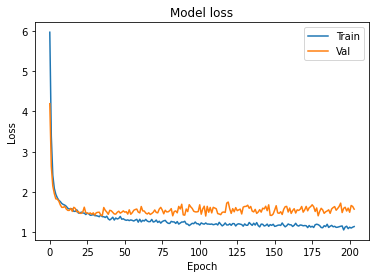

In [288]:
plot.plot(historico.history['loss'])
plot.plot(historico.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plt.savefig("Perdas_6_movimentos_pontos_dos_esqueletos.png")
plot.show()

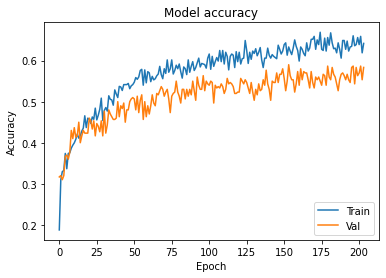

In [289]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Acuracia_6_movimentos_pontos_dos_esqueletos.png")
plt.show()

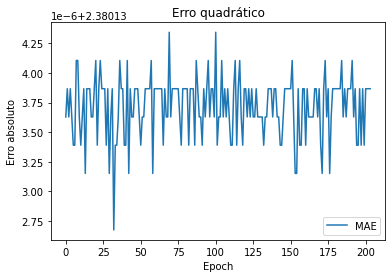

In [290]:
#Erro 
plot.plot(historico.history['mean_absolute_error'])
#plot.plot(historico.history['mean_squared_error'])
plot.title('Erro quadrático')
plot.ylabel('Erro absoluto')
plot.xlabel('Epoch')
plot.legend(['MAE'], loc='lower right')
plt.savefig("Erro_quadratico_6_movimentos_pontos_dos_esqueletos.png")
plot.show()

In [120]:
model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_movimentos_pontos_dos_esqueletos", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

INFO:tensorflow:Assets written to: /tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_movimentos_pontos_dos_esqueletos/assets


In [121]:
load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_movimentos_pontos_dos_esqueletos") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


In [122]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,StratifiedKFold
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np

y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)

In [123]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_Pred)


array([[31,  0,  9,  1,  0,  0],
       [ 0, 39,  1,  1,  0,  1],
       [33,  2,  4,  2,  0,  0],
       [11,  1,  2, 26,  0,  2],
       [34,  2,  2,  3,  0,  1],
       [13,  1,  0,  6,  0, 22]])

In [124]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(24,24)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

Normalized confusion matrix


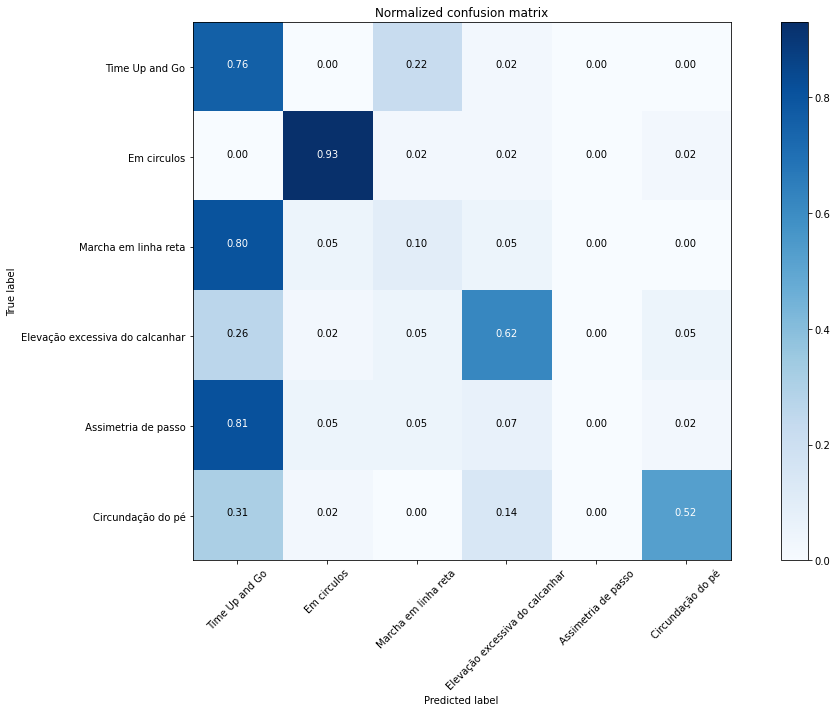

In [125]:
# Plot normalized confusion matrix

plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("Matrix Confusao Normalizada.png")
plt.show()

Confusion matrix, without normalization


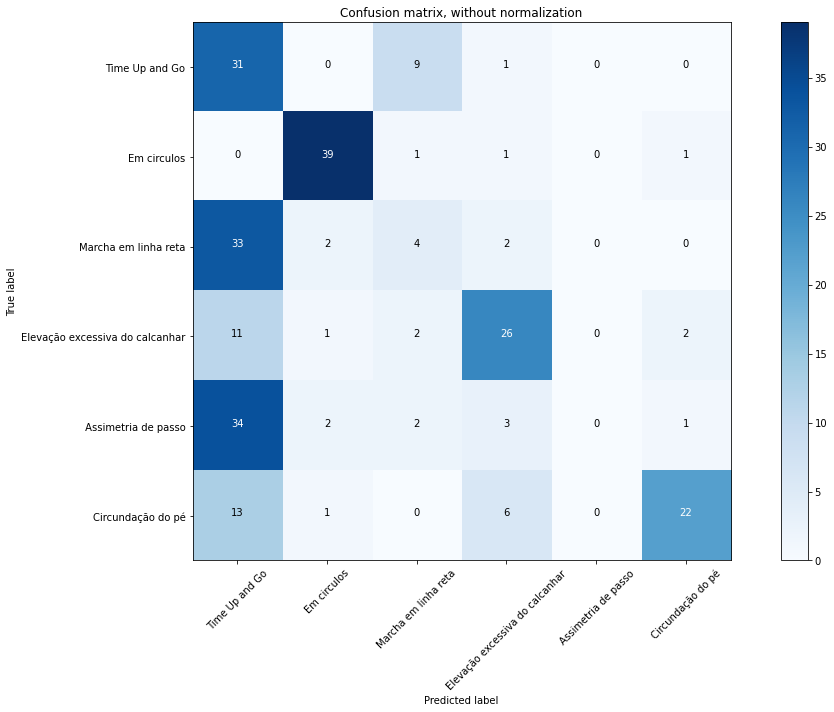

In [126]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 10))
plt.savefig("Matrix Confusao.png")
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS,title='Confusion matrix, without normalization',normalize=False)
plt.show()

In [127]:

print(classification_report(Y_test,y_Pred,digits=5, target_names=CATEGORIAS))


                                 precision    recall  f1-score   support

                 Time Up and Go    0.25410   0.75610   0.38037        41
                    Em circulos    0.86667   0.92857   0.89655        42
           Marcha em linha reta    0.22222   0.09756   0.13559        41
Elevação excessiva do calcanhar    0.66667   0.61905   0.64198        42
            Assimetria de passo    0.00000   0.00000   0.00000        42
              Circundação do pé    0.84615   0.52381   0.64706        42

                       accuracy                        0.48800       250
                      macro avg    0.47597   0.48751   0.45026       250
                   weighted avg    0.47787   0.48800   0.45180       250



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def ROC_E_AUC(y_Pred,Y_val):
    lw=2
    n_classes=6
    # Binarize the output
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    n_classes = Y_val.shape[1]

    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], y_Pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), y_Pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(15, 10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    #plt.savefig("Curva_ROC_6_movimentos_RGB_8/4_CICLOS.png")
    plt.show()
    print(roc_auc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


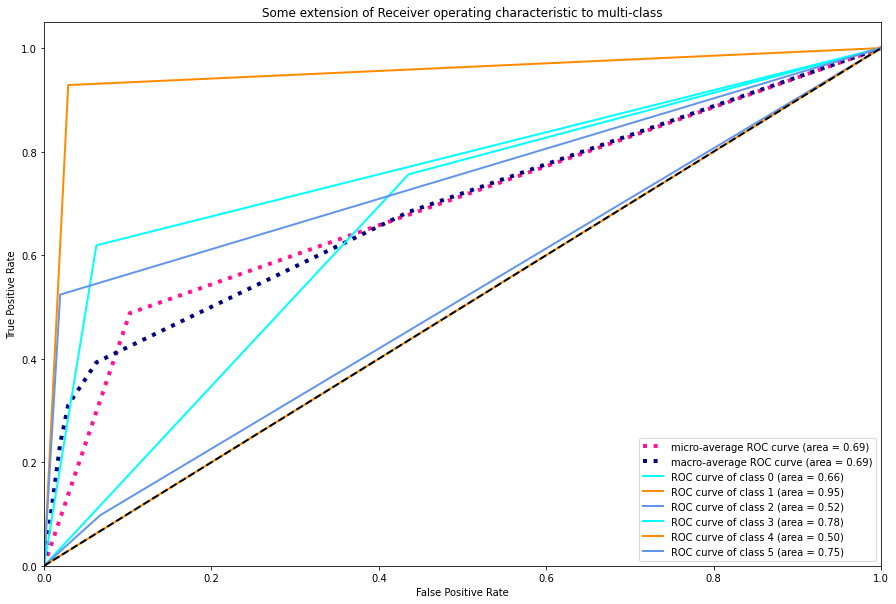

{0: 0.6603454312055083, 1: 0.9498626373626373, 2: 0.515287664838371, 3: 0.7782738095238095, 4: 0.5, 5: 0.7522893772893772, 'micro': 0.6928, 'macro': 0.692676486703284}


In [129]:
ROC_E_AUC(y_Pred,Y_test)

In [130]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

def Average_Precision_Recall(Y_val,y_Pred):
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])
    plt.figure(figsize=(15, 10))
    # precision recall curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    average_precision_score=[]
    for i in range(0,6):
        precision[i], recall[i], _ = precision_recall_curve(Y_val[:, i],
                                                            y_Pred[:, i])
        #average_precision[i] = average_precision_score(Y_val[:, i], y_Pred[:, i])

        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_val.ravel(),
            y_Pred.ravel())
    #average_precision["micro"] = average_precision_score(Y_val, y_Pred,
    #                                                         average="micro")
    #print('Average precision score, micro-averaged over all classes: {0:0.2f}'
    #          .format(average_precision["micro"]))
    #plt.suptitle(
    #    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    #    .format(average_precision["micro"]))
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    #plt.savefig("Curva_precision vs. recall_movimentos_FOLD_5_RGB_1_CICLO -70_30.png")
    plt.show()

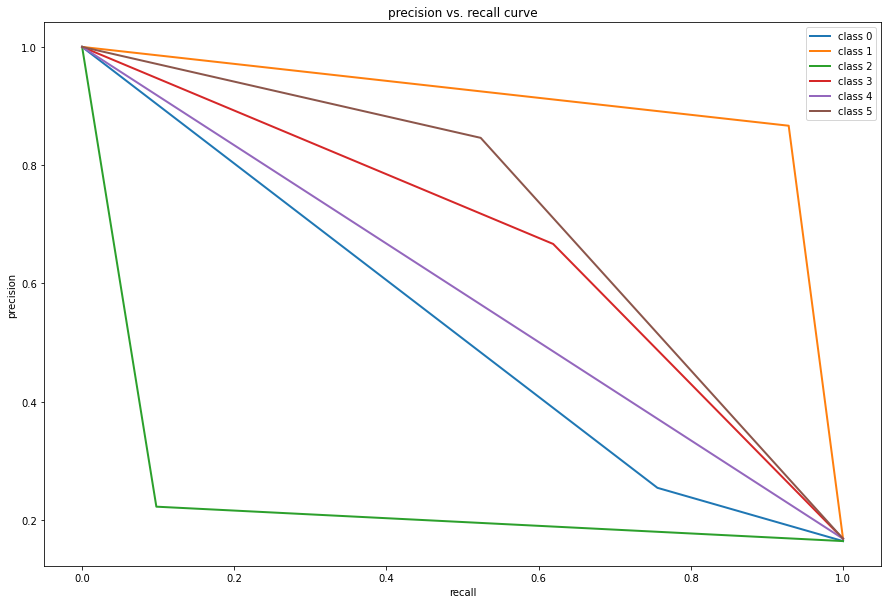

In [131]:
Average_Precision_Recall(Y_test,y_Pred)

In [132]:
##USANDO CROSS VALIDATION##

In [133]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_val), axis=0)
targets = np.concatenate((Y_train, Y_val), axis=0)

Train on 638 samples, validate on 240 samples
Epoch 1/100
638/638 [==============================] - 1s 2ms/sample - loss: 7.2179 - mean_absolute_error: 2.4122 - acc: 0.1771 - val_loss: 6.0089 - val_mean_absolute_error: 2.4319 - val_acc: 0.3667
Epoch 2/100
638/638 [==============================] - 1s 853us/sample - loss: 5.2748 - mean_absolute_error: 2.4122 - acc: 0.2696 - val_loss: 4.5164 - val_mean_absolute_error: 2.4319 - val_acc: 0.3125
Epoch 3/100
638/638 [==============================] - 1s 801us/sample - loss: 4.1060 - mean_absolute_error: 2.4122 - acc: 0.2868 - val_loss: 3.6051 - val_mean_absolute_error: 2.4319 - val_acc: 0.3625
Epoch 4/100
638/638 [==============================] - 1s 867us/sample - loss: 3.3832 - mean_absolute_error: 2.4122 - acc: 0.3276 - val_loss: 3.0217 - val_mean_absolute_error: 2.4319 - val_acc: 0.3958
Epoch 5/100
638/638 [==============================] - 1s 899us/sample - loss: 2.9828 - mean_absolute_error: 2.4122 - acc: 0.3307 - val_loss: 2.7083 - v

638/638 [==============================] - 1s 823us/sample - loss: 1.4487 - mean_absolute_error: 2.4122 - acc: 0.4828 - val_loss: 1.2768 - val_mean_absolute_error: 2.4319 - val_acc: 0.5375
Epoch 42/100
638/638 [==============================] - 1s 837us/sample - loss: 1.4410 - mean_absolute_error: 2.4122 - acc: 0.4404 - val_loss: 1.2847 - val_mean_absolute_error: 2.4319 - val_acc: 0.5292
Epoch 43/100
638/638 [==============================] - 1s 904us/sample - loss: 1.4705 - mean_absolute_error: 2.4122 - acc: 0.4765 - val_loss: 1.2679 - val_mean_absolute_error: 2.4319 - val_acc: 0.5625
Epoch 00043: early stopping
Score for fold 1: loss of 1.3868649005889893; acc of 55.62499761581421%
INFO:tensorflow:Assets written to: /tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2/assets


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

              precision    recall  f1-score   support

         0.0    0.23295   1.00000   0.37788        41
         1.0    1.00000   0.88095   0.93671        42
         2.0    0.00000   0.00000   0.00000        41
         3.0    0.64865   0.57143   0.60759        42
         4.0    0.00000   0.00000   0.00000        42
         5.0    0.00000   0.00000   0.00000        42

    accuracy                        0.40800       250
   macro avg    0.31360   0.40873   0.32036       250
weighted avg    0.31518   0.40800   0.32142       250



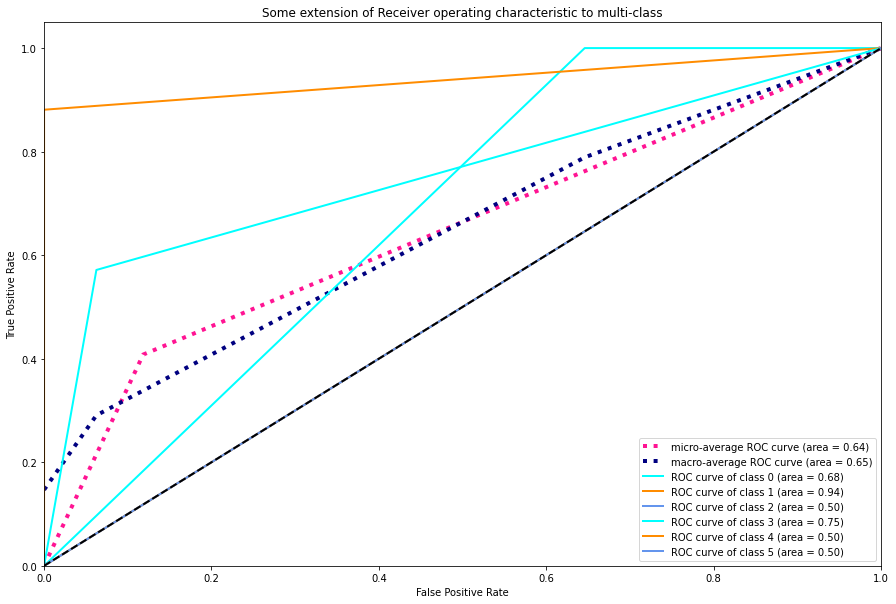

{0: 0.6770334928229664, 1: 0.9404761904761905, 2: 0.5, 3: 0.7544642857142857, 4: 0.5, 5: 0.5, 'micro': 0.6447999999999999, 'macro': 0.6453289948355738}
Train on 638 samples, validate on 240 samples
Epoch 1/100
638/638 [==============================] - 1s 2ms/sample - loss: 7.1543 - mean_absolute_error: 2.4117 - acc: 0.1787 - val_loss: 5.9523 - val_mean_absolute_error: 2.4319 - val_acc: 0.2750
Epoch 2/100
638/638 [==============================] - 1s 787us/sample - loss: 5.2324 - mean_absolute_error: 2.4117 - acc: 0.2931 - val_loss: 4.4567 - val_mean_absolute_error: 2.4319 - val_acc: 0.3042
Epoch 3/100
638/638 [==============================] - 1s 850us/sample - loss: 4.0688 - mean_absolute_error: 2.4117 - acc: 0.2978 - val_loss: 3.5518 - val_mean_absolute_error: 2.4319 - val_acc: 0.3292
Epoch 4/100
638/638 [==============================] - 1s 792us/sample - loss: 3.3619 - mean_absolute_error: 2.4117 - acc: 0.2994 - val_loss: 3.0340 - val_mean_absolute_error: 2.4319 - val_acc: 0.3417


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

              precision    recall  f1-score   support

         0.0    0.24845   0.97561   0.39604        41
         1.0    0.92683   0.90476   0.91566        42
         2.0    0.00000   0.00000   0.00000        41
         3.0    0.86667   0.61905   0.72222        42
         4.0    1.00000   0.02381   0.04651        42
         5.0    0.76471   0.30952   0.44068        42

    accuracy                        0.47200       250
   macro avg    0.63444   0.47213   0.42019       250
weighted avg    0.63852   0.47200   0.42196       250



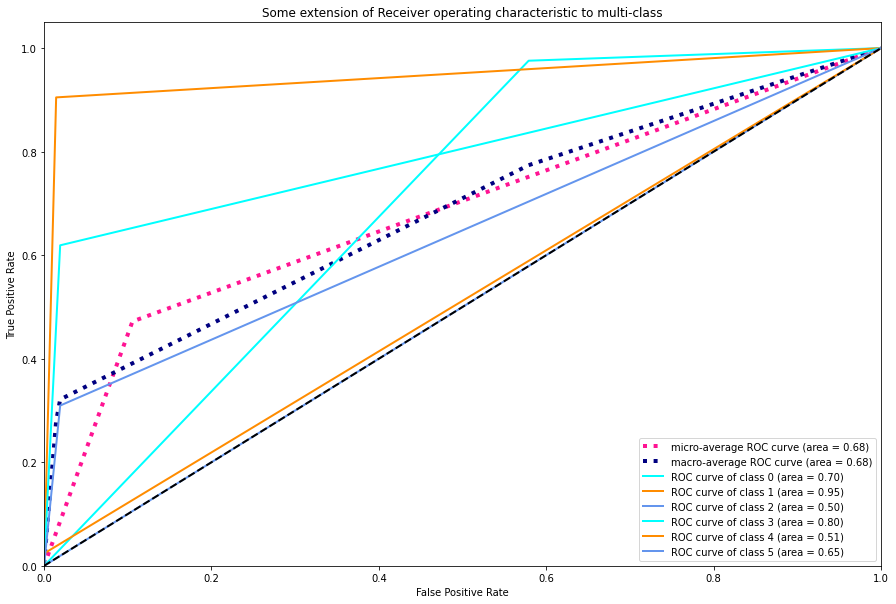

{0: 0.6983311938382541, 1: 0.9451694139194139, 2: 0.5, 3: 0.7999084249084248, 4: 0.5119047619047619, 5: 0.6451465201465201, 'micro': 0.6831999999999999, 'macro': 0.6834100524528958}
Train on 638 samples, validate on 240 samples
Epoch 1/100
638/638 [==============================] - 1s 2ms/sample - loss: 7.3958 - mean_absolute_error: 2.3516 - acc: 0.1865 - val_loss: 6.1837 - val_mean_absolute_error: 2.4319 - val_acc: 0.4000
Epoch 2/100
638/638 [==============================] - 1s 798us/sample - loss: 5.4904 - mean_absolute_error: 2.3516 - acc: 0.2461 - val_loss: 4.7455 - val_mean_absolute_error: 2.4319 - val_acc: 0.3708
Epoch 3/100
638/638 [==============================] - 1s 850us/sample - loss: 4.3558 - mean_absolute_error: 2.3516 - acc: 0.3182 - val_loss: 3.8724 - val_mean_absolute_error: 2.4319 - val_acc: 0.3583
Epoch 4/100
638/638 [==============================] - 1s 1ms/sample - loss: 3.6756 - mean_absolute_error: 2.3516 - acc: 0.3448 - val_loss: 3.3115 - val_mean_absolute_erro

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

              precision    recall  f1-score   support

         0.0    0.25000   1.00000   0.40000        41
         1.0    1.00000   0.83333   0.90909        42
         2.0    0.00000   0.00000   0.00000        41
         3.0    0.69767   0.71429   0.70588        42
         4.0    0.00000   0.00000   0.00000        42
         5.0    0.87500   0.16667   0.28000        42

    accuracy                        0.45200       250
   macro avg    0.47045   0.45238   0.38250       250
weighted avg    0.47321   0.45200   0.38396       250



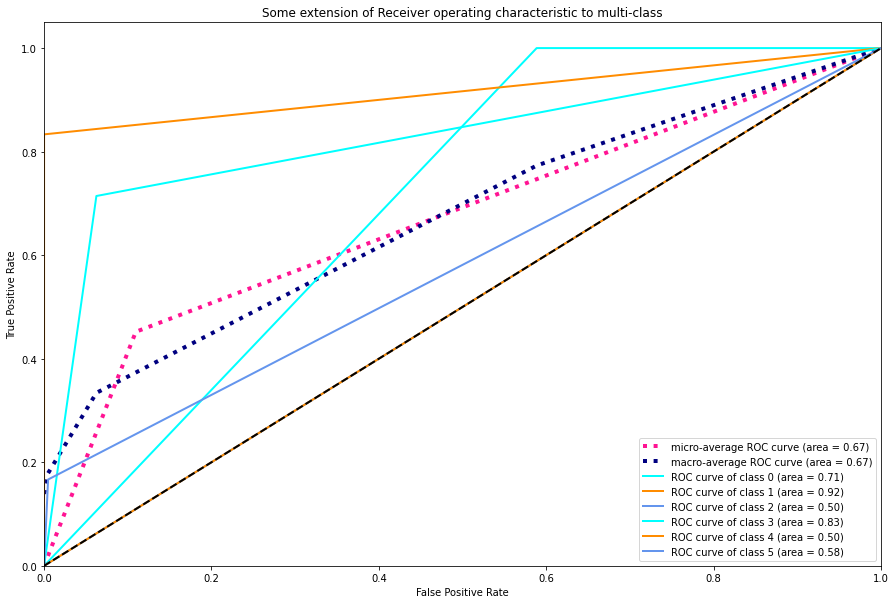

{0: 0.7057416267942584, 1: 0.9166666666666667, 2: 0.5, 3: 0.8258928571428572, 4: 0.5, 5: 0.5809294871794872, 'micro': 0.6712, 'macro': 0.6715384396305448}
Train on 639 samples, validate on 240 samples
Epoch 1/100
639/639 [==============================] - 1s 2ms/sample - loss: 7.1822 - mean_absolute_error: 2.3466 - acc: 0.1737 - val_loss: 5.9594 - val_mean_absolute_error: 2.4319 - val_acc: 0.3042
Epoch 2/100
639/639 [==============================] - 1s 847us/sample - loss: 5.2100 - mean_absolute_error: 2.3466 - acc: 0.2848 - val_loss: 4.4619 - val_mean_absolute_error: 2.4319 - val_acc: 0.3083
Epoch 3/100
639/639 [==============================] - 1s 1ms/sample - loss: 4.0639 - mean_absolute_error: 2.3466 - acc: 0.3146 - val_loss: 3.6174 - val_mean_absolute_error: 2.4319 - val_acc: 0.3083
Epoch 4/100
639/639 [==============================] - 1s 881us/sample - loss: 3.3842 - mean_absolute_error: 2.3466 - acc: 0.3224 - val_loss: 3.0602 - val_mean_absolute_error: 2.4319 - val_acc: 0.3708

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

              precision    recall  f1-score   support

         0.0    0.23977   1.00000   0.38679        41
         1.0    0.95000   0.90476   0.92683        42
         2.0    0.00000   0.00000   0.00000        41
         3.0    0.58974   0.54762   0.56790        42
         4.0    0.00000   0.00000   0.00000        42
         5.0    0.00000   0.00000   0.00000        42

    accuracy                        0.40800       250
   macro avg    0.29658   0.40873   0.31359       250
weighted avg    0.29800   0.40800   0.31455       250



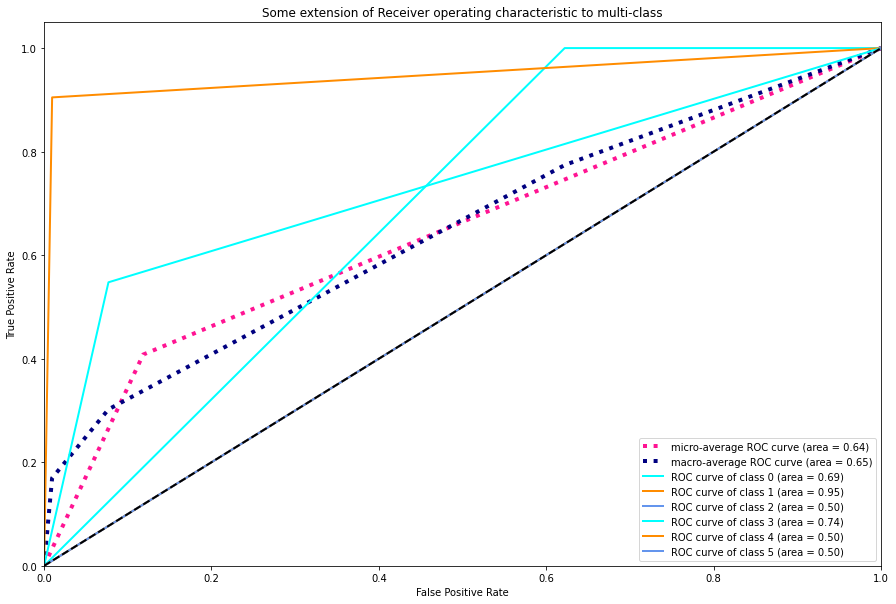

{0: 0.6889952153110048, 1: 0.94757326007326, 2: 0.5, 3: 0.7353479853479854, 4: 0.5, 5: 0.5, 'micro': 0.6447999999999999, 'macro': 0.6453194101220417}
Train on 639 samples, validate on 240 samples
Epoch 1/100
639/639 [==============================] - 1s 2ms/sample - loss: 7.2561 - mean_absolute_error: 2.3764 - acc: 0.1894 - val_loss: 6.1055 - val_mean_absolute_error: 2.4319 - val_acc: 0.3250
Epoch 2/100
639/639 [==============================] - 1s 865us/sample - loss: 5.4561 - mean_absolute_error: 2.3764 - acc: 0.2363 - val_loss: 4.6871 - val_mean_absolute_error: 2.4319 - val_acc: 0.3167
Epoch 3/100
639/639 [==============================] - 1s 882us/sample - loss: 4.2800 - mean_absolute_error: 2.3764 - acc: 0.2879 - val_loss: 3.7613 - val_mean_absolute_error: 2.4319 - val_acc: 0.3750
Epoch 4/100
639/639 [==============================] - 1s 959us/sample - loss: 3.5381 - mean_absolute_error: 2.3764 - acc: 0.3067 - val_loss: 3.1344 - val_mean_absolute_error: 2.4319 - val_acc: 0.3500
Ep

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

              precision    recall  f1-score   support

         0.0    0.21809   1.00000   0.35808        41
         1.0    1.00000   0.88095   0.93671        42
         2.0    0.00000   0.00000   0.00000        41
         3.0    0.60000   0.35714   0.44776        42
         4.0    0.00000   0.00000   0.00000        42
         5.0    0.00000   0.00000   0.00000        42

    accuracy                        0.37200       250
   macro avg    0.30301   0.37302   0.29042       250
weighted avg    0.30457   0.37200   0.29132       250



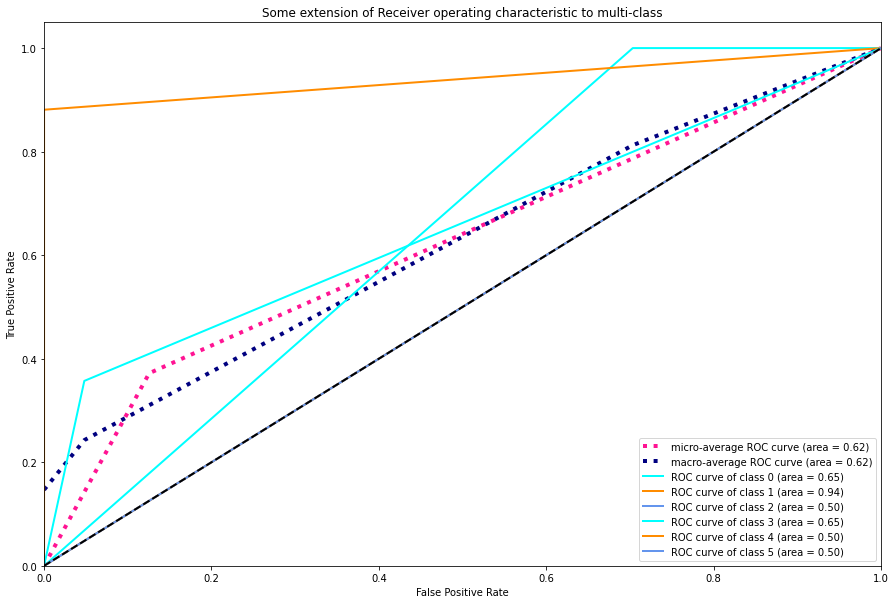

{0: 0.6483253588516746, 1: 0.9404761904761905, 2: 0.5, 3: 0.654532967032967, 4: 0.5, 5: 0.5, 'micro': 0.6232, 'macro': 0.6238890860601387}


In [134]:
from sklearn.model_selection import KFold
num_folds=5

kfold = KFold(n_splits=num_folds, shuffle=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.0001, patience=10)

fold_no = 1
for train, test in kfold.split(inputs, targets):
    model = Sequential([
    Dense(200, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.00175)),
    Dropout(0.5),
    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    #Dense(4000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    #Dropout(0.3),
    Dense(10000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    Dense(1000, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    Dense(200, kernel_regularizer=regularizers.l2(0.0015),activation='relu'),
    Dropout(0.5),
    #Dense(200, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0001),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    #Dense(100, kernel_regularizer=regularizers.l2(0.0002),activation='relu'),
    #Dropout(0.3),
    Dense(6, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mae','accuracy'])#,keras.metrics.Recall(),keras.metrics.Precision()])
    ##historico = model.fit(inputs[train], targets[train],
    ##      batch_size=64, epochs=1000,callbacks=[es])
    historico= model.fit(inputs[train], targets[train],class_weight=class_weight,shuffle=True,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val),callbacks=[es])
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[2]} of {scores[2]*100}%')
    acc_per_fold.append(scores[2] * 100)
    loss_per_fold.append(scores[0])
    model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')
    load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')
    y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
    y_pred=(np.around(y_pred))
#print(y_pred)
    y_Pred=[]
    for i in range(0,len(y_pred)):
        #print(np.argmax(y_pred[i]))
        y_Pred.append(np.argmax(y_pred[i]))
    print(classification_report(Y_test,y_Pred,digits=5))
    ROC_E_AUC(y_Pred,Y_test)
    fold_no = fold_no + 1


In [135]:
y_pred = load_model.predict(X_val)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))

In [136]:

print(classification_report(Y_val,y_Pred,digits=5, target_names=CATEGORIAS))


                                 precision    recall  f1-score   support

                 Time Up and Go    0.21714   1.00000   0.35681        38
                    Em circulos    1.00000   1.00000   1.00000        44
           Marcha em linha reta    0.00000   0.00000   0.00000        35
Elevação excessiva do calcanhar    0.85714   0.43902   0.58065        41
            Assimetria de passo    0.00000   0.00000   0.00000        36
              Circundação do pé    0.00000   0.00000   0.00000        46

                       accuracy                        0.41667       240
                      macro avg    0.34571   0.40650   0.32291       240
                   weighted avg    0.36414   0.41667   0.33902       240



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
#X_normalizado.shape

In [138]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.3868649005889893 - Accuracy: 55.62499761581421%
------------------------------------------------------------------------
> Fold 2 - Loss: 1.544448184967041 - Accuracy: 50.62500238418579%
------------------------------------------------------------------------
> Fold 3 - Loss: 1.4994843244552611 - Accuracy: 54.374998807907104%
------------------------------------------------------------------------
> Fold 4 - Loss: 1.5563351253293596 - Accuracy: 37.106919288635254%
------------------------------------------------------------------------
> Fold 5 - Loss: 1.4817888669247896 - Accuracy: 45.91194987297058%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 48.72877359390259 (+- 6.723621671694746)
> Loss: 1.493784280453088
-----------------------------

In [139]:
model.save("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2", save_format='tf')#("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

INFO:tensorflow:Assets written to: /tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2/assets


In [140]:
load_model = tf.keras.models.load_model("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada_6_movimentos_v2") #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


In [141]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = load_model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
#print(y_pred)
y_pred=(np.around(y_pred))
#print(y_pred)

y_Pred=[]
for i in range(0,len(y_pred)):
    #print(np.argmax(y_pred[i]))
    y_Pred.append(np.argmax(y_pred[i]))
#print(y_Pred)

Normalized confusion matrix


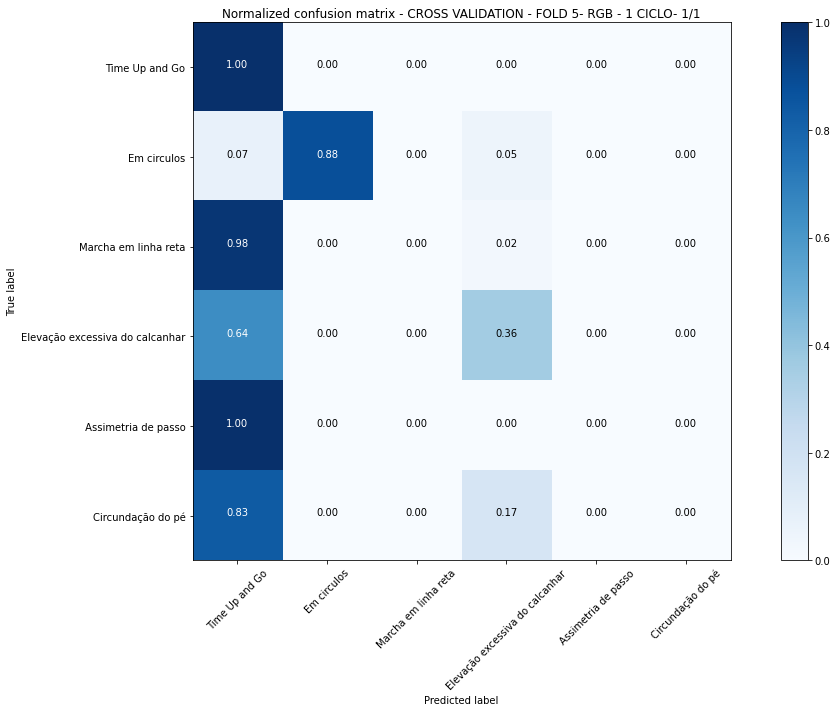

In [142]:
# Plot normalized confusion matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - CROSS VALIDATION - FOLD 5- RGB - 1 CICLO- 1/1')
plt.savefig("Matrix Confusao Normalizada CROSS VALIDATION - FOLD 5'.png")
plt.show()

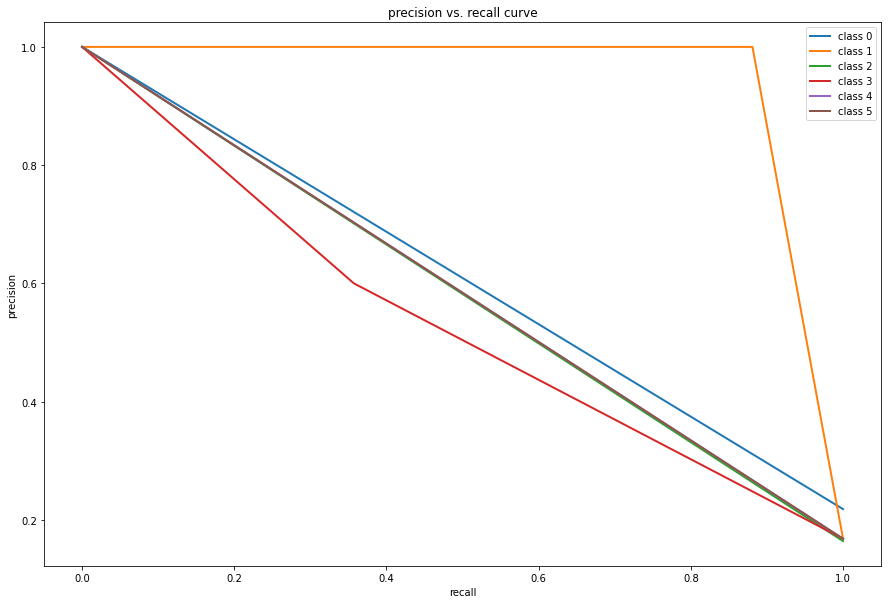

In [143]:
Average_Precision_Recall(Y_test,y_Pred)

In [95]:
##TERMINEI DE USAR O CROSS VALIDATION##

In [96]:
data_validation=pd.read_csv('Parâmetros_de_todos_para_validacao.csv') #('/tf/tensorflow-tutorials/Modelo_1/Parâmetros_de_todos_para_validacao.csv')


In [97]:
data_validation

,Altura (m),Idade,Sexo,Velocidade média (m/s),Cadência,Comprimento médio passada,Erro absoluto médio do comprimento de passo em metros,Desvio padrão comprimento passo medido em metros,Desvio padrão do erro de comprimento de passo em metros,Largura da passada,...,Desvio padrão do ângulo médio da coxa do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo,Desvio padrão do ângulo de flexão do joelho esquerdo,Ângulo médio de flexão do joelho esquerdo.1,Desvio padrão do ângulo de flexão do joelho esquerdo.1,Ângulo extensão do quadril (°),Desvio padrão do ângulo de extensão do quadril (°),Simetria do comprimento de passo,Desvio padrão da simetria do comprimento de passo,Movimento
0,1.8,22.0,0,2.4771,85.8114,0.8814,0.0814,0.2463,0.07,0.1860,...,63.673795,61.693840,2.613028,61.690105,3.119239,-4.002852,1.733533,0.972743,0.106210,0
1,1.8,22.0,0,2.5769,89.2423,0.9061,0.1061,0.2671,0.11,0.1861,...,63.253689,61.736346,3.042173,61.975232,3.899347,-3.881163,1.479701,1.085146,0.200919,0
2,1.8,22.0,0,2.6541,86.1764,0.9491,0.1491,0.3012,0.10,0.1962,...,59.499057,61.937911,1.581422,60.901554,5.842651,-3.751775,0.506643,0.977227,0.219753,0
3,1.8,22.0,0,2.5441,85.9300,0.9463,0.1463,0.2617,0.13,0.1781,...,65.269423,61.934617,3.343345,62.321509,3.386579,-2.811931,1.125254,1.082421,0.406247,0
4,1.8,22.0,0,2.4322,98.2647,0.9189,0.1189,0.3031,0.07,0.1736,...,60.205562,59.058891,5.442693,61.020977,6.290838,-2.878588,1.073991,0.971814,0.206311,0
5,1.8,22.0,0,2.4834,81.9007,0.9940,0.1940,0.2050,0.15,0.1691,...,67.004030,59.624753,6.736223,60.523253,5.750733,-2.300516,1.037823,0.973417,0.514254,0
6,1.8,22.0,0,2.6105,96.1523,0.8999,0.0999,0.2878,0.12,0.1854,...,64.341093,62.082713,3.069286,63.230412,3.736002,-1.151960,1.098725,1.084448,0.391825,0
7,1.8,22.0,0,2.4497,88.9866,0.8634,0.0634,0.2904,0.11,0.1648,...,57.431759,61.655226,1.237801,61.800631,1.625464,-3.332839,0.552155,1.000249,0.067091,0
8,1.8,22.0,0,2.7436,71.0517,1.0446,0.2446,0.1432,0.14,0.2024,...,62.859746,60.539179,1.519639,60.372408,1.005581,-4.040164,0.680107,1.127755,0.323693,0
9,1.8,22.0,0,3.1189,76.4596,1.0251,0.2251,0.3308,0.19,0.2383,...,62.350125,59.445123,4.308981,59.491695,5.649206,-1.924048,1.299007,0.897770,0.352336,0


In [98]:
dataset_validation=data_validation[['Velocidade média (m/s)','Comprimento médio passada','Largura da passada','Simetria do comprimento de passo','Cadência','Movimento']]

In [99]:
dataset_validation

,Velocidade média (m/s),Comprimento médio passada,Largura da passada,Simetria do comprimento de passo,Cadência,Movimento
0,2.4771,0.8814,0.1860,0.972743,85.8114,0
1,2.5769,0.9061,0.1861,1.085146,89.2423,0
2,2.6541,0.9491,0.1962,0.977227,86.1764,0
3,2.5441,0.9463,0.1781,1.082421,85.9300,0
4,2.4322,0.9189,0.1736,0.971814,98.2647,0
5,2.4834,0.9940,0.1691,0.973417,81.9007,0
6,2.6105,0.8999,0.1854,1.084448,96.1523,0
7,2.4497,0.8634,0.1648,1.000249,88.9866,0
8,2.7436,1.0446,0.2024,1.127755,71.0517,0
9,3.1189,1.0251,0.2383,0.897770,76.4596,0


In [100]:
datasheet_validation=dataset_validation.values

In [101]:
valores_linhas_validation=datasheet_validation[:,0:5]

In [102]:
X_normalizado_validacao=min_max_escalar.fit_transform(valores_linhas_validation)

In [103]:
X_normalizado_validacao

array([[-1.06, -1.4 , -0.68, -0.45,  0.46],
       [-0.59, -0.94, -0.68,  1.11,  0.84],
       [-0.22, -0.12, -0.35, -0.39,  0.5 ],
       [-0.74, -0.18, -0.94,  1.08,  0.47],
       [-1.28, -0.69, -1.08, -0.47,  1.85],
       [-1.03,  0.73, -1.23, -0.45,  0.02],
       [-0.43, -1.05, -0.7 ,  1.1 ,  1.61],
       [-1.2 , -1.75, -1.37, -0.07,  0.81],
       [ 0.21,  1.68, -0.14,  1.71, -1.18],
       [ 2.01,  1.32,  1.03, -1.5 , -0.58],
       [ 0.67,  0.06,  1.23, -0.49,  0.04],
       [ 1.31, -0.07,  1.29, -0.37, -0.92],
       [ 0.84, -0.07,  1.29, -0.37, -1.19],
       [-0.49,  1.68, -0.14,  1.71, -1.61],
       [ 1.45,  0.72,  1.13, -1.66, -1.17],
       [ 0.56,  0.08,  1.34, -0.48,  0.04]])

In [104]:
import numpy as np

In [105]:
CATEGORIAS=["Time Up and Go","Em círculos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

for line in range(0,len(X_normalizado_validacao)):
    #print(X_normalizado_validacao[line])
    teste = X_normalizado_validacao[line].reshape([1,5])
    print(teste)
    prediction=load_model.predict(teste)
    print(prediction)
    prediction=(np.around(prediction).reshape([1,6]))
    print(prediction)
    print(CATEGORIAS[(np.argmax(prediction))])

[[-1.06 -1.4  -0.68 -0.45  0.46]]


ValueError: Error when checking input: expected dense_25_input to have shape (45,) but got array with shape (5,)

In [ ]:
teste = [1.05364409,  0.88002339, 0.20362799,  0.80318584, 19.08771569] #X_normalizado_validacao[line].reshape([1,5])
teste=np.array(teste)
print(teste)
